# Opencv_ROS_LineDectection 

## 이미지만 처리를 해보기

#### 필요한 디펜던시들 받아오기

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#### 일단 이미지로만 해보자

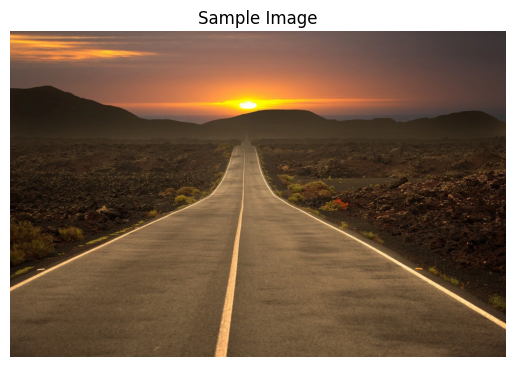

In [6]:
# 이미지 보여주는 함수
def show_image(img, title="Image", cmap=None):
    # 컬러(BGR) -> RGB 변환
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 이미지 로드
img = cv2.imread("3.png")
show_image(img, title="Sample Image")

### Line Finding and Direction 
1. 이미지 불러오기
2. 허프 변환으로 직선 검출
3. 검출된 직선의 기울기의 평균으로 방향 판단

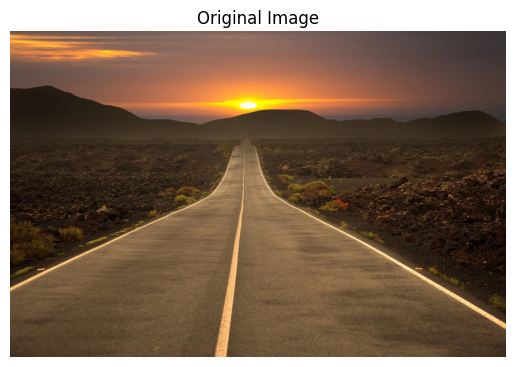

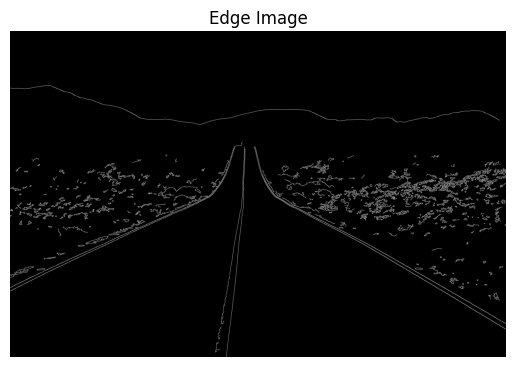

검출된 직선 개수: 757
평균 기울기: -0.2201
결론: 왼쪽으로 가야 함


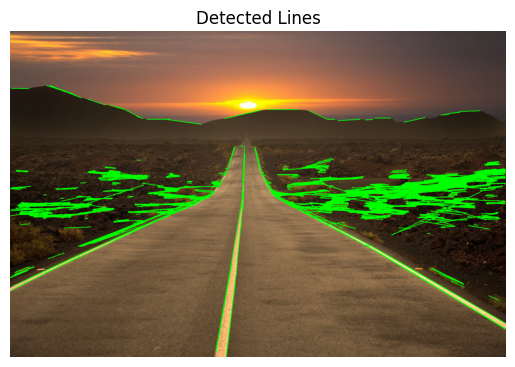

In [ ]:
def detect_line_and_direction(image_path):
    # 1. 이미지 불러오기
    image = cv2.imread(image_path)

    # 2. 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 3. 블러 적용(노이즈 제거)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # 4. 에지(Edge) 검출(Canny)
    edges = cv2.Canny(blur, 50, 150)

    # 그레이스케일 이미지
    show_image(edges, title="Edge Image", cmap='gray')

    # 5. 허프 변환을 통한 직선 검출
    lines = cv2.HoughLinesP(
        edges,             # 에지 영상
        rho=1,             # 거리 해상도
        theta=np.pi/180,   # 각도 해상도
        threshold=50,      # 직선 검출을 위한 최소 누적 수
        minLineLength=10,  # 직선으로 인정되는 최소 길이
        maxLineGap=50      # 직선 상에서 인접한 점들 사이 최대 허용 간격
    )

    slopes = []
    # lines가 None이 아닐 때 직선이 검출된 것
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # 직선 그리기(초록색, 두께=2)
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # 기울기 계산
            if (x2 - x1) != 0:  # x1 != x2 일 때
                slope = (y2 - y1) / (x2 - x1)
                slopes.append(slope)

    # 평균 기울기를 통해 방향 추정
    direction = "찾을 수 없음"
    if len(slopes) > 0:
        avg_slope = np.mean(slopes)
        # 기준값 0.1, -0.1을 예시로 사용
        if avg_slope > 0.1:
            direction = "오른쪽으로 가야 함"
        elif avg_slope < -0.1:
            direction = "왼쪽으로 가야 함"
        else:
            direction = "앞으로 가야 함"

        print(f"검출된 직선 개수: {len(lines)}")
        print(f"평균 기울기: {round(avg_slope, 4)}")
        print(f"결론: {direction}")
    else:
        print("직선을 찾지 못했습니다.")

    # 직선이 그려진 최종 이미지 표시
    show_image(image, title="Detected Lines")

    return direction

# --- 사용 예시 ---
if __name__ == "__main__":
    direction_result = detect_line_and_direction("3.png")


## WebCam으로 해보자

#### 필요한 라이브러리 불러오기

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, Image, clear_output
import io

#### 카메라 작동 확인

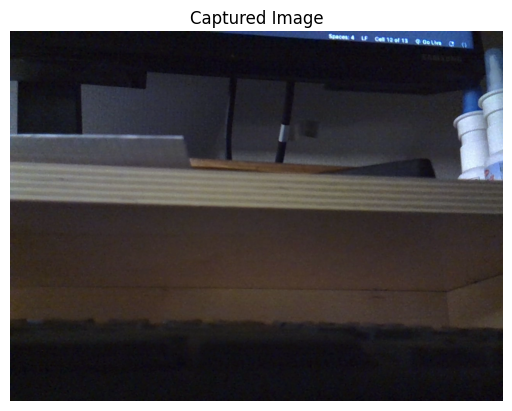

: 

In [ ]:
# 카메라를 작동을 시키기(인덱스 0 -> 웹캠)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
else:
    # 사진 캡처
    ret, frame = cap.read()
    if ret:
        # 캡처한 이미지를 표시
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Captured Image")
        plt.show()
    else:
        print("사진을 캡처할 수 없습니다.")

    # 웹캠 해제
    cap.release()


#### 웹켐으로 실제 작동을 보기
위에서 만든 함수 detect_line_and_direction과 별반 다를 것이 없다

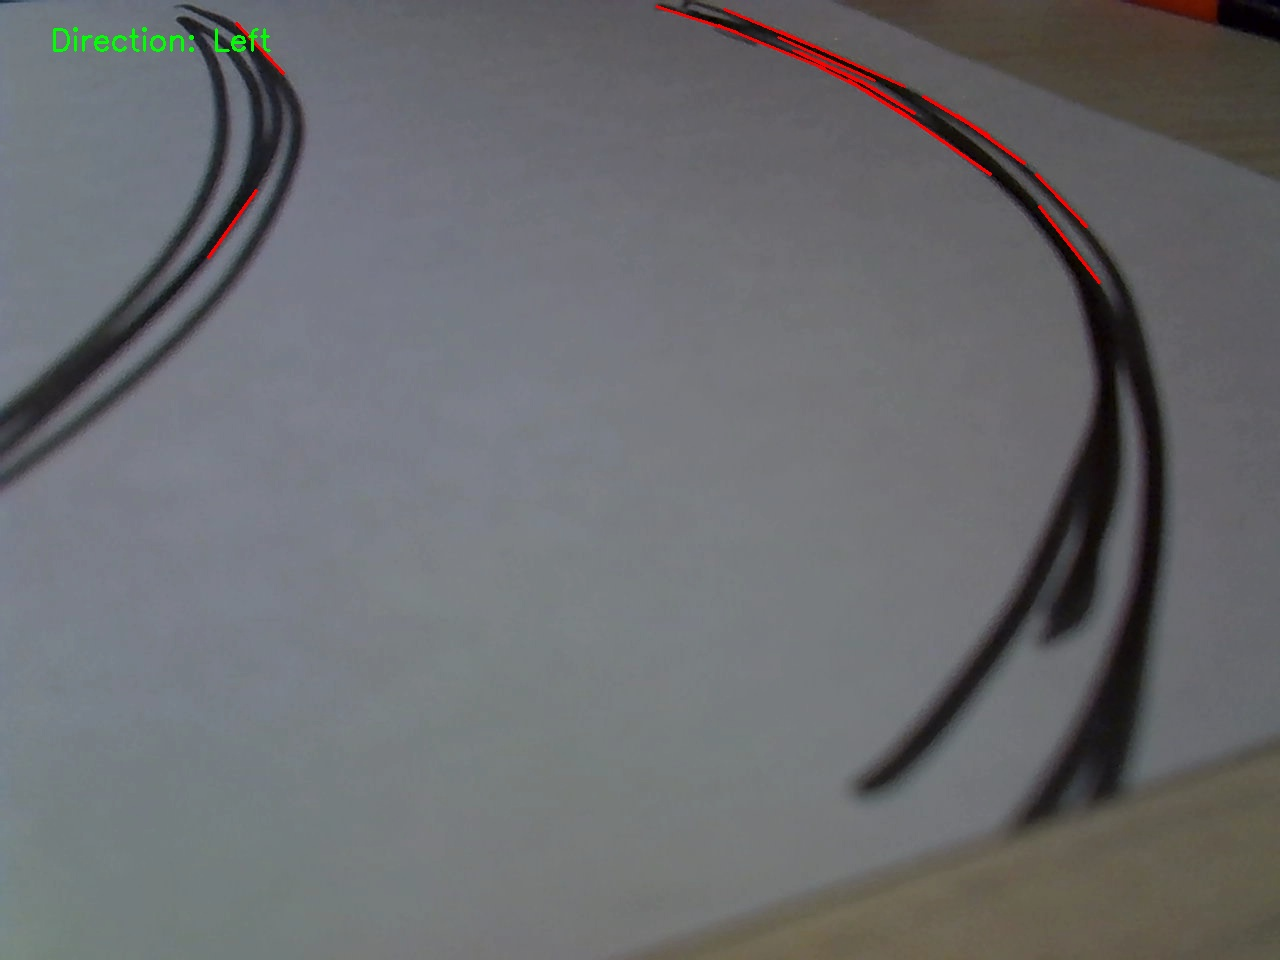

이미지가 저장되고 노트북에 표시되었습니다.


KeyboardInterrupt: 

: 

In [1]:
def main():
    # 웹캠 작동시키기
    cap = cv2.VideoCapture(0)
    
    try:
        while True:
            ret, frame = cap.read()

            # 1. 흑백 변환
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # 2. 노이즈 제거를 위한 블러
            blur = cv2.GaussianBlur(gray, (5, 5), 0)

            # 3. 엣지 검출 (Canny)
            edges = cv2.Canny(blur, 50, 150)

            # 4. 허프 라인 검출
            lines = cv2.HoughLinesP(
                edges,
                1,                   # 거리 해상도(픽셀)
                np.pi / 180,         # 각도 해상도(라디안)
                threshold=50,        # 최소 누적 투표 횟수
                minLineLength=50,    # 검출할 선의 최소 길이
                maxLineGap=10        # 선을 이어붙일 수 있는 최대 간격
            )

            # 초기 값
            direction = "No line detected"

            # 5. 검출된 선이 있으면 기울기를 통해 방향 판단
            if lines is not None and len(lines) > 0:
                slopes = []
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    # 라인을 화면에 표시 (빨간색 선, 두께 2)
                    cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

                    # x2 - x1이 0이 되는 경우를 방지하기 위한 epsilon 추가
                    slope = (y2 - y1) / (x2 - x1 + 1e-8)
                    slopes.append(slope)

                # 모든 라인의 기울기 평균
                avg_slope = np.mean(slopes)

                # 간단한 임계값으로 방향 분류
                if avg_slope > 0.1:
                    direction = "Left"
                elif avg_slope < -0.1:
                    direction = "Right"
                else:
                    direction = "Straight"

            # 6. 방향 텍스트를 프레임 위에 표시
            cv2.putText(
                frame,
                f"Direction: {direction}",
                (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 255, 0),
                2
            )

            # 결과 화면 출력
            cv2.imshow("Line Detection", frame)

            # 키 입력 대기
            key = cv2.waitKey(1) & 0xFF
            if key == ord('q'):
                print("종료합니다.")
                break
            elif key == ord('s'):
                # 's' 키가 눌리면 현재 프레임을 이미지로 저장하고 노트북에 표시
                _, buffer = cv2.imencode('.jpg', frame)
                io_buf = io.BytesIO(buffer)
                clear_output(wait=True)
                display(Image(data=io_buf.getvalue()))
                print("이미지가 저장되고 노트북에 표시되었습니다.")

    finally:
        cap.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()